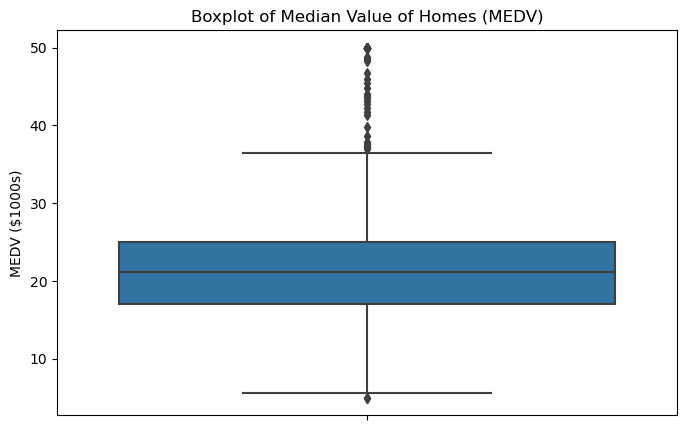

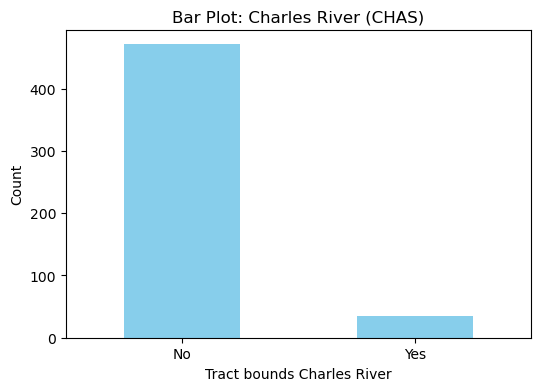

C:\Users\AyushiPandey\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


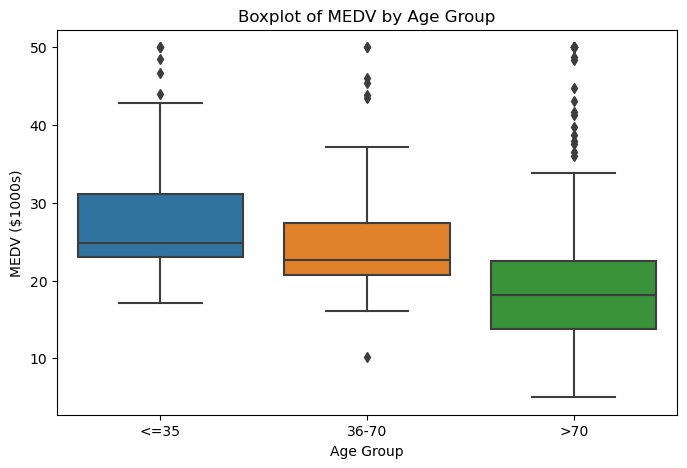

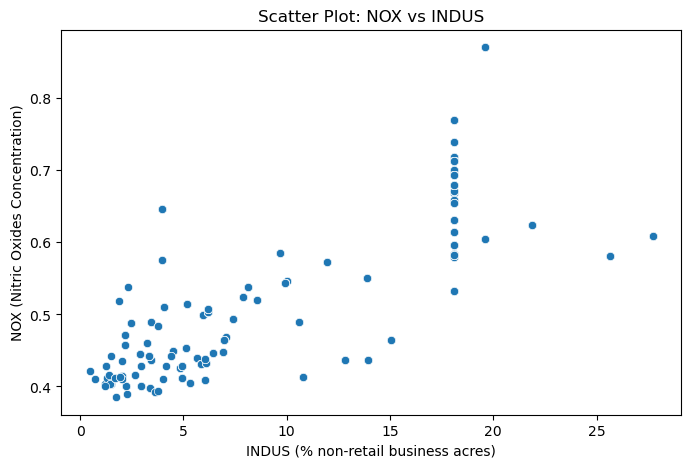

C:\Users\AyushiPandey\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


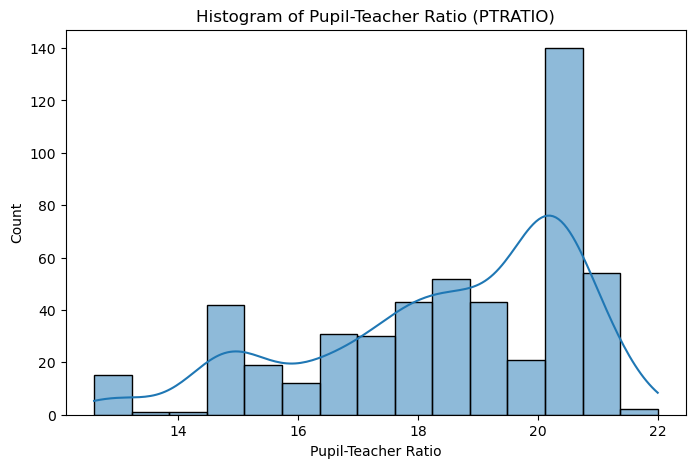

T-test: MEDV by CHAS
T-statistic: 3.9964, p-value: 0.0001
Conclusion: Significant difference in MEDV based on proximity to Charles River.

ANOVA: MEDV by AGE Group
F-statistic: 36.4076, p-value: 0.0000
Conclusion: There is a significant difference in MEDV across age groups.

Pearson Correlation: NOX vs INDUS
Correlation coefficient: 0.7637, p-value: 0.0000
Conclusion: Significant correlation between NOX and INDUS.

Linear Regression: MEDV ~ DIS
                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 16 Apr 2025   Prob (F-statistic):           1.21e-08
Time:                        21:18:01   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652

C:\Users\AyushiPandey\AppData\Local\Temp\ipykernel_24284\3050066375.py:76: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = boston_df.groupby('AGE_GROUP')['MEDV'].apply(list)


In [1]:
# 📦 Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, f_oneway, pearsonr
import statsmodels.api as sm
import statsmodels.formula.api as smf

# 📥 Load Dataset from CSV URL
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv' 
boston_df = pd.read_csv(boston_url)

# 👁️ View Dataset
boston_df.head()

# 📊 Task 2: Visualizations

# 1. Boxplot of MEDV
plt.figure(figsize=(8,5))
sns.boxplot(y=boston_df['MEDV'])
plt.title('Boxplot of Median Value of Homes (MEDV)')
plt.ylabel('MEDV ($1000s)')
plt.show()

# 2. Bar plot for CHAS
plt.figure(figsize=(6,4))
chas_counts = boston_df['CHAS'].value_counts().sort_index()
chas_counts.plot(kind='bar', color='skyblue')
plt.title('Bar Plot: Charles River (CHAS)')
plt.xticks(ticks=[0,1], labels=['No', 'Yes'], rotation=0)
plt.ylabel('Count')
plt.xlabel('Tract bounds Charles River')
plt.show()

# 3. Boxplot for MEDV vs Age groups
age_bins = pd.cut(boston_df['AGE'], bins=[0,35,70,100], labels=['<=35','36-70','>70'])
boston_df['AGE_GROUP'] = age_bins
plt.figure(figsize=(8,5))
sns.boxplot(x='AGE_GROUP', y='MEDV', data=boston_df)
plt.title('Boxplot of MEDV by Age Group')
plt.xlabel('Age Group')
plt.ylabel('MEDV ($1000s)')
plt.show()

# 4. Scatter plot: NOX vs INDUS
plt.figure(figsize=(8,5))
sns.scatterplot(x='INDUS', y='NOX', data=boston_df)
plt.title('Scatter Plot: NOX vs INDUS')
plt.xlabel('INDUS (% non-retail business acres)')
plt.ylabel('NOX (Nitric Oxides Concentration)')
plt.show()

# 5. Histogram of PTRATIO
plt.figure(figsize=(8,5))
sns.histplot(boston_df['PTRATIO'], bins=15, kde=True)
plt.title('Histogram of Pupil-Teacher Ratio (PTRATIO)')
plt.xlabel('Pupil-Teacher Ratio')
plt.show()

# 🧪 Task 3: Statistical Tests

# 1. T-test: MEDV by CHAS
group1 = boston_df[boston_df['CHAS'] == 1]['MEDV']
group0 = boston_df[boston_df['CHAS'] == 0]['MEDV']
t_stat, p_value = ttest_ind(group1, group0)

print("T-test: MEDV by CHAS")
print(f"T-statistic: {t_stat:.4f}, p-value: {p_value:.4f}")
if p_value < 0.05:
    print("Conclusion: Significant difference in MEDV based on proximity to Charles River.")
else:
    print("Conclusion: No significant difference in MEDV based on proximity to Charles River.")

# 2. ANOVA: MEDV by AGE group
grouped = boston_df.groupby('AGE_GROUP')['MEDV'].apply(list)
f_stat, p_value = f_oneway(*grouped)

print("\nANOVA: MEDV by AGE Group")
print(f"F-statistic: {f_stat:.4f}, p-value: {p_value:.4f}")
if p_value < 0.05:
    print("Conclusion: There is a significant difference in MEDV across age groups.")
else:
    print("Conclusion: No significant difference in MEDV across age groups.")

# 3. Pearson Correlation: NOX vs INDUS
corr, p_val = pearsonr(boston_df['NOX'], boston_df['INDUS'])
print("\nPearson Correlation: NOX vs INDUS")
print(f"Correlation coefficient: {corr:.4f}, p-value: {p_val:.4f}")
if p_val < 0.05:
    print("Conclusion: Significant correlation between NOX and INDUS.")
else:
    print("Conclusion: No significant correlation between NOX and INDUS.")

# 4. Regression: DIS -> MEDV
model = smf.ols('MEDV ~ DIS', data=boston_df).fit()
print("\nLinear Regression: MEDV ~ DIS")
print(model.summary())
